<a href="https://colab.research.google.com/github/jacobrobertsdev/MLA_JAR/blob/main/MLA5_JAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Jacob Roberts**  

## Standard Imports

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [22]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Imports for Splitting Data and Building Pipeline


In [23]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [25]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [26]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [27]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_test.csv')

### Statistical and Visual Exploration

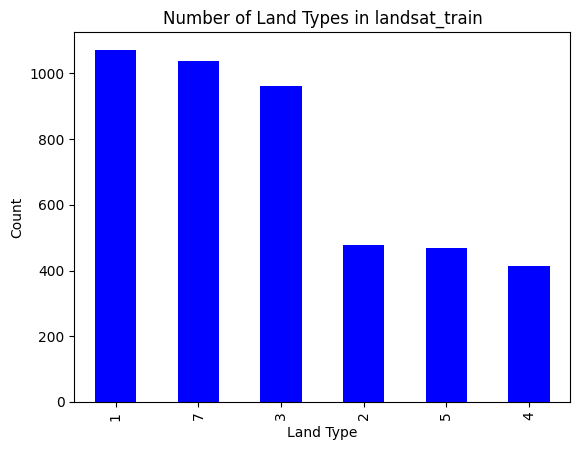

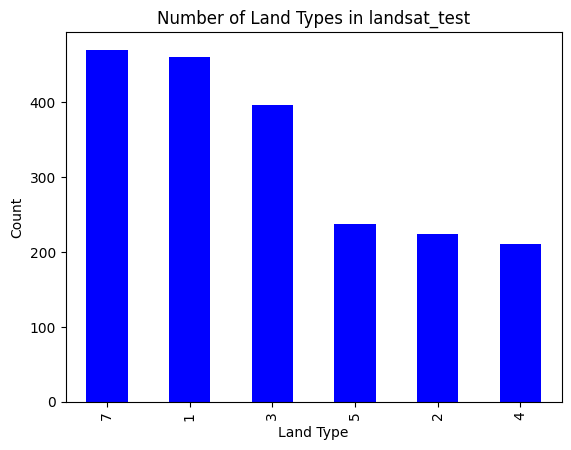

In [28]:
landsat_train['land_type'].value_counts().plot(kind='bar', color='blue')
plt.title('Number of Land Types in landsat_train')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

landsat_test['land_type'].value_counts().plot(kind='bar', color='blue')
plt.title('Number of Land Types in landsat_test')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

### Splitting Data into Train/Test

In [29]:
X_train = landsat_train.drop(columns=['land_type'])
y_train = landsat_train['land_type']


X_test = landsat_test.drop(columns=['land_type'])
y_test = landsat_test['land_type']


### Building the Pipeline

In [30]:
col_transform = ColumnTransformer(transformers=[
                                 ('num', MinMaxScaler(), X_train.columns)],
                                 remainder='passthrough')


pipeline = Pipeline(steps=[
    ('transform', col_transform),
    ('classifier', RandomForestClassifier(random_state=42))
])

### Executing the Model

In [31]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middl...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

### Evaluating Model

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.99      0.97      0.98       224
           3       0.89      0.95      0.92       397
           4       0.77      0.64      0.70       211
           5       0.92      0.91      0.91       237
           7       0.88      0.90      0.89       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



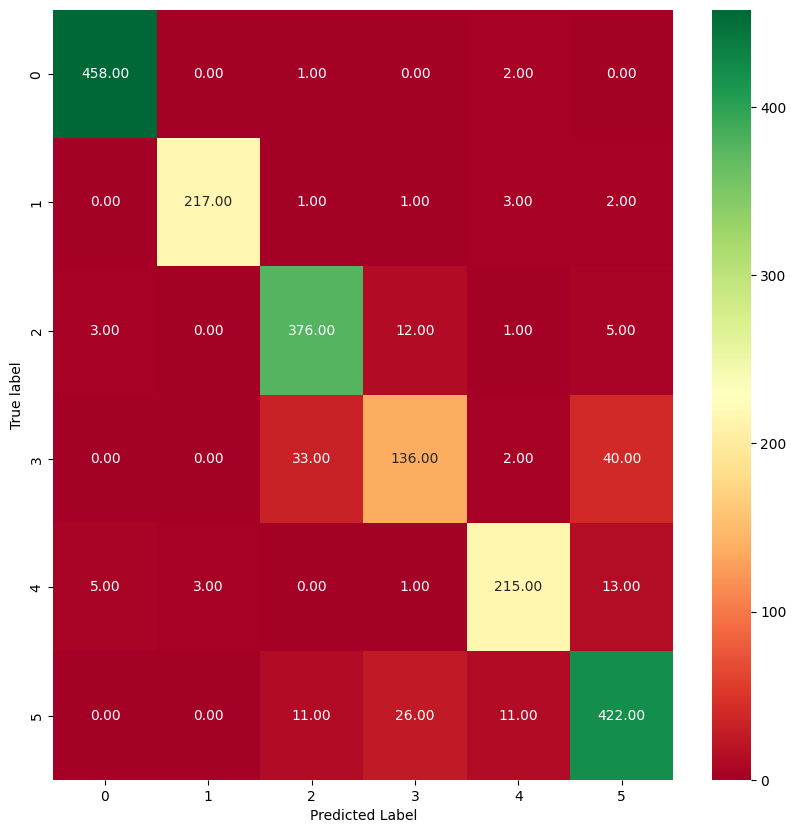

In [33]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
plot_cm(y_test, y_pred)

### Conclusion
This model performed very well across all classes, with the worst performance being on class 4. Class 4 had .77, .64, .70 for precision, recall, and f1. All other classes ranged from .89 to .99, with the averages (weighted/macro) ranging from .89 to .91, suggesting a strong overall success rate at classifying the different land types. I'd be curious to figure out why only class 4 had results below .89.

## Problem 2

### Reading the Data

In [34]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_test.csv')

### Splitting Data into Train/Test

In [35]:
X_train = landsat_train.drop(columns=['land_type'])
y_train = landsat_train['land_type']


X_test = landsat_test.drop(columns=['land_type'])
y_test = landsat_test['land_type']

### Building the Pipeline

In [36]:
col_transform = ColumnTransformer(transformers=[
                                 ('num', MinMaxScaler(), X_train.columns)],
                                 remainder='passthrough')

knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(max_iter=100000)
svc = SVC(kernel='rbf')

pipeline = Pipeline(steps=[
    ('transform', col_transform),
    ('voting_ensemble', VotingClassifier(
        estimators=[('knn', knn), ('lr', lr), ('svc', svc)],
        voting='hard'
    ))
])

### Executing the Model

In [37]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middl...
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('voting_ensemble',
                 VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                                              ('lr',
                                               LogisticRegression(max_iter=100000)),
                                              ('svc', SVC())]))])

### Evaluating Model

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       461
           2       0.98      0.97      0.97       224
           3       0.87      0.96      0.91       397
           4       0.70      0.54      0.61       211
           5       0.91      0.84      0.88       237
           7       0.83      0.86      0.85       470

    accuracy                           0.89      2000
   macro avg       0.88      0.86      0.87      2000
weighted avg       0.88      0.89      0.88      2000



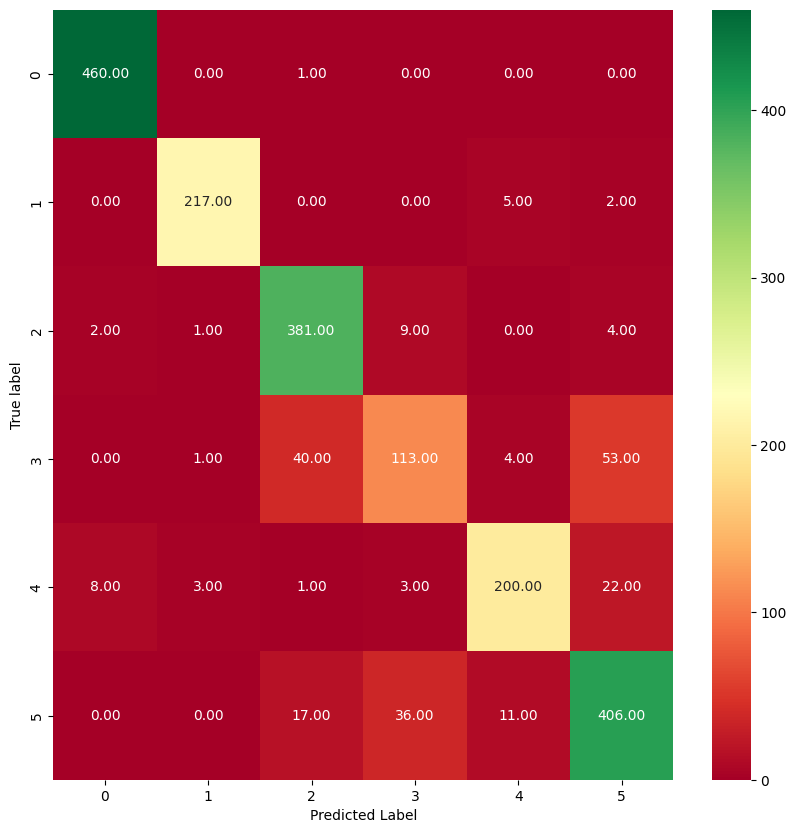

In [38]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
plot_cm(y_test, y_pred)

### Conclusion
Similar to the last model, this one performed well on all but land type 4. The overall accuracy was .89, so performance was good. However, there appears to be something different going on with class 4, that could warrant further investigation. Otherwise, precision, recall, and f1 ranged between .83 and 1.00, so the model is performing well overall.

#Problem 3

## Reading the data

In [40]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

## Statistical and Visual Exploration

In [41]:
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Splitting into test/train

In [42]:
X = df.drop(columns=['forgery'])
y = df['forgery']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building pipeline

In [43]:
col_transform = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), X.columns)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(
    steps=[
        ('col_transform', col_transform),
        ('classifier', RandomForestClassifier(random_state=42))
    ]
)

## Executing model

In [44]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('col_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

## Evaluating model

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



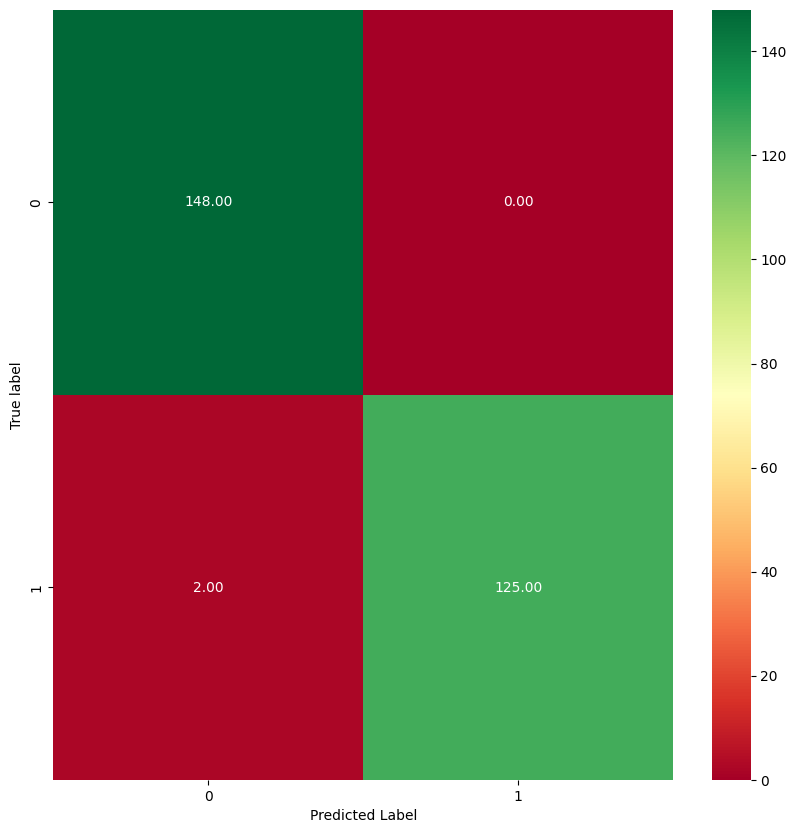

In [47]:
y_pred = pipeline.predict(x_test)
print(classification_report(y_test, y_pred))
plot_cm(y_test, y_pred)

## Conclusion

The model performed exceptionally well, with an accuracy of 0.99. Precision, recall, and f1 ranged from .98 to 1.00 on both classes. Overall averages were 0.99 across precision, recall, and f1 for both classes.